In [1]:
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt

df = fdr.DataReader('004840','2015')
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)
dfx = df[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx
X = dfx.values.tolist()
y = dfy.values.tolist()
window_size = 10
window_size2= 20
data_X = []
data_y = []
for i in range(len(y) - window_size2):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size:i + window_size2]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(10, 4)))
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=70, batch_size=30)
pred_y = model.predict(test_X)

[[0.0988530033195076, 0.07816074424219795, 0.11922103810381644, 0.0004367702687530472], [0.09923030485889503, 0.08121091962725933, 0.11768764854621108, 0.0006885160770312606], [0.10224871717399449, 0.08235473539665734, 0.11998773288261912, 0.0010407458428446843], [0.10300332025276936, 0.0857861827048514, 0.12688798589184322, 0.0016906760801824242], [0.1090401448829683, 0.08616745462798407, 0.12727133328124457, 0.001759675064356602], [0.10941744642235574, 0.09608052462943358, 0.12535459633423787, 0.00387452742394766], [0.1135677633556175, 0.09684306847569892, 0.13302154412226463, 0.0021058757927179127], [0.1158315725919421, 0.09684306847569892, 0.13877175496328473, 0.0006652037988830918], [0.1180953818282667, 0.10065578770702564, 0.1395384497420874, 0.0016585212137711568], [0.11998188952520387, 0.10713741040028109, 0.13723836540567938, 0.003821203937148975]] -> [[0.11561834109292385], [0.11246152631905562], [0.1191697577135256], [0.11127772077885503], [0.10378028569091799], [0.109699313

In [2]:
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score,f1_score,precision_score
from sklearn import preprocessing
from sklearn import utils

In [3]:
pred_y

array([[0.37648028],
       [0.3580688 ],
       [0.34210157],
       [0.33201382],
       [0.32540137],
       [0.32092744],
       [0.3218774 ],
       [0.32551104],
       [0.3247136 ],
       [0.32038078],
       [0.31444407],
       [0.30651793],
       [0.29763222],
       [0.28810245],
       [0.2820132 ],
       [0.277062  ],
       [0.27370444],
       [0.27209958],
       [0.27214912],
       [0.27351254],
       [0.27665892],
       [0.2810237 ],
       [0.28725943],
       [0.2921675 ],
       [0.29620257],
       [0.29921257],
       [0.3000677 ],
       [0.3002208 ],
       [0.29923803],
       [0.29735336],
       [0.29441875],
       [0.29086068],
       [0.2864465 ],
       [0.2817625 ],
       [0.27646014],
       [0.27221894],
       [0.2692346 ],
       [0.29470548],
       [0.30442265],
       [0.30804035],
       [0.30851212],
       [0.3064786 ],
       [0.30369964],
       [0.30068368],
       [0.29745418],
       [0.29658768],
       [0.30012405],
       [0.308

19/19 [==============================] - 0s 1ms/step


ValueError: x and y can be no greater than 2D, but have shapes (597,) and (597, 10, 1)

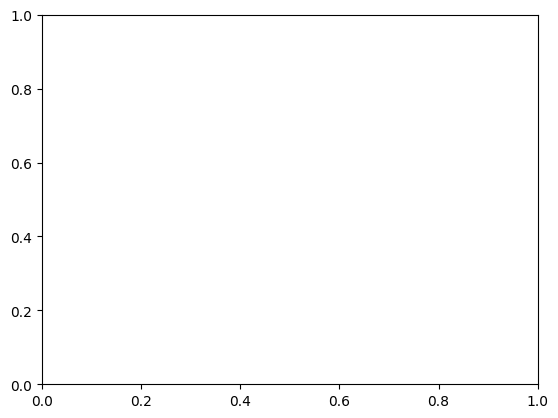

In [4]:
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

print("내일 SEC 주가 :", df.Close[-1] * pred_y[-1] / dfy.Close[-1], 'KRW')